### Constants

In [1]:
# gravity
g = 9.81 # m s^-2

# for Kerbin
G = 6.67408*10^-11 # m^3 kg^-1 s^-2
M = 5.2915*10^22 # kg
u = G*M # m^3 s^-2
u = 3.5316*10^12

### Find velocity for circular orbit

In [29]:
r_surf = 600*10^3 # m
r_orbit = r_surf + 80*10^3 # m
v_orbit = sqrt(u*(1/r_orbit))
print("Velocity Orbit:\t%f m/s" % v_orbit)

Velocity Orbit:	2278.931638 m/s


### Velocity Gained due to Earths Rotation

In [30]:
T = 21600 # secs
C_surf = 3769911 # m
v_surf = C_surf / T
print("Velocity of Earths Surface:\t%f m/s" % v_surf)

Velocity of Earths Surface:	174.532917 m/s


### Velocity Lost due to Gravity

In [31]:
# time in gravitational pull
t_gravity = 120
v_gravity = t_gravity * g
print("Velocity due to gravity:\t%f m/s" % v_gravity)

Velocity due to gravity:	1177.200000 m/s


### Parametric Model of Rocket Speed

In [5]:
# first and second stage, second stage is assumed to be in vaccumn

ton2kg = 907.1847 / 1 # kg / ton
# both liquid fuel and oxidizer have same density
p_f = 5 / 1 # kg / unit

# first stage, assume to be at sea level
# RE-M3 "Mainsial" Liquid Fuel Engine
F_1 = 1379.032*10^3 # kN
Isp_1 = 285 # sec
m0_1 = 43.4 * ton2kg # kg
m1_1 = 25.4 * ton2kg # kg
fuel_1 = 98.68 # fuel / sec
mf_1 = p_f * fuel_1 # kg / sec
bo_1 = (m0_1 - m1_1) * (1/mf_1) # sec

# second stage, assume to be in vaccumn
# RE-J10 "Wolfhound" Liquid Fuel Engine AJ10
F_2 = 375.0*10^3 # kN
Isp_2 = 380 # sec
m0_2 = 16.8 * ton2kg # kg
m1_2 = 7.8 * ton2kg # kg
fuel_2 = 20.13 # fuel / sec
mf_2 = p_f * fuel_2 # kg / sec
bo_2 = (m0_2 - m1_2) * (1/mf_2) # sec

# f - mass flow rate
F, m0, f, t = var('F m0 f t')
a(t) = F / (m0 - f*t)
v = a.integrate(t)
x = v.integrate(t)

#sub_vars = {F:F_1, m0:m0_1, f:mf_1}
#a_1 = a.subs(sub_vars)
#v_1 = v.subs(sub_vars)
#x_1 = v.subs(sub_vars)

In [16]:
# first stage
a_1 = F_1 / (m0_1 - mf_1 * t)

v_1 = a_1.integrate(t)
v_1 = v_1 - v_1(0)

In [17]:
a_2 = F_2 / (m0_2 - mf_2 * (t))
a_2s = F_2 / (m0_2 - mf_2 * (t-bo_1))

v_2 = a_2.integrate(t)
v_2s = a_2s.integrate(t)

# adjust for C and offset from first stage
v_2s = v_2s + (v_1(bo_1) - v_2s(bo_1))

#plot([v_2, v_2s])
#plot([a_2, a_2s, a_2(0)], xmin=0, xmax=bo_2, ymin=0)

### Velocity vs Time Graph

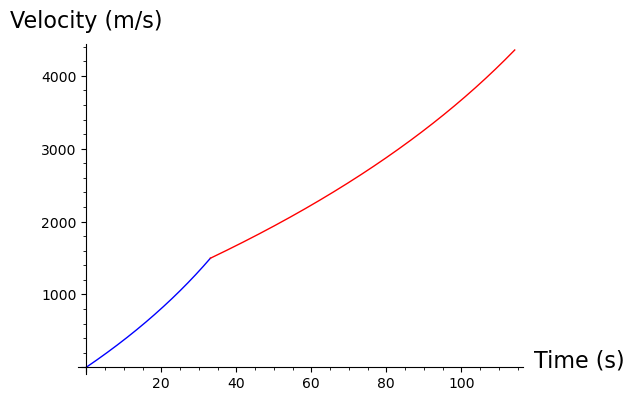

In [28]:
v_plt1 = plot(v_1, xmin=0, xmax=bo_1, ymin=0)
v_plt2 = plot([v_2s], xmin=bo_1, xmax=bo_2 + bo_1, ymin=0, rgbcolor=(1,0,0))

v_comb = v_plt1 + v_plt2
v_comb.axes_labels(["Time (s)", "Velocity (m/s)"])

show(v_comb)

### Velocity Function

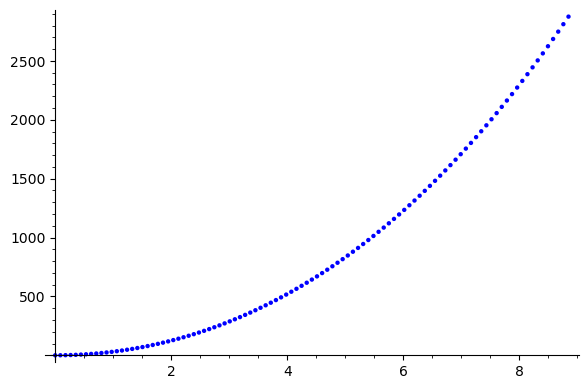

(8.847879668836518, [2876.4819686347005, 731.0098486558948])
817.871663681947


In [9]:
# constants
#F_rocket = 192 # in vaccum
F_rocket = 162.92
m0 = 2.34
m1 = 1.29
Isp = 140
delta_m = m0 - m1

# conversion betewen mass and solid fuel
conv_m_sf = delta_m / 140 # kg/s
# flow rate in kg/s
flow = 15.823 * conv_m_sf
t_burnout = 140/15.823

# acceleration as a function of time

T = ode_solver()

def distance(t, y):
    DE = [
        y[1],
        #F_rocket/(m0 - flow*t) - g*(r_surf/(r_surf+y[0])^2)
        F_rocket/(m0 - flow*t) - u/(r_surf + y[0])^2
    ]
    return DE

T.function = distance
T.ode_solve(y_0=[0,0], t_span=[0,t_burnout], num_points=100)
T.plot_solution()
print(T.solution[-1])

v_total = Isp * g * ln(m0/m1)
print(v_total)